<a href="https://colab.research.google.com/github/LuisYurovich/-Entregable_TP1_Mentorias/blob/main/TP1_Mentoria_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diplomatura en Ciencia de Datos
---
## Mentorias N°16. Grupo 2
## Analisis inteligente de jugadores de un reconocido juego electronico


# Trabajo Práctico 1

**Integrantes:**


* Luis Federico Yurovich

* Nicolás Nazareno Rosales

* Rocío Martinez

# **Análisis inicial del dataset**

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

seaborn.set_context('talk')


  
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

**1) Cargar el dataset y armar el DataFrame.**

In [ ]:
link = "https://drive.google.com/file/d/14jAHU8n9BTvMI63cxOAgUv9uaGMyMxWH/view"

  
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('datos_jugadores.csv')   
  
df = pd.read_csv('datos_jugadores.csv') 

In [ ]:
df.head() #se muestran las primeras 5 filas del df

,id,datetime,has_studies,gender,country,state,age,cups
0,5316ca1c5ddca8e6ceccfce58f3b8540e540ee22f6180f...,2021-11-08 14:05:15,f,Hombre,Argentina,Santa Fe,1997.0,1268
1,bbb965ab0c80d6538cf2184babad2a564a010376712012...,2021-11-08 14:05:16,t,Hombre,Argentina,Santa fe,1999.0,1212
2,b4944c6ff08dc6f43da2e9c824669b7d927dd1fa976fad...,2021-11-08 14:05:16,f,Hombre,Argentina,Entre Rios,2003.0,1343
3,434c9b5ae514646bbd91b50032ca579efec8f22bf0b4aa...,2021-11-08 14:05:16,t,Hombre,Venezuela,Aragua,2000.0,1237
4,cd70bea023f752a0564abb6ed08d42c1440f2e33e29914...,2021-11-08 14:05:16,t,Hombre,Venezuela,Carabobo,2000.0,1191


**2) ¿Cuántos ejemplos y cuántos features hay en el dataset? ¿Qué información indica cada uno de los features?**

In [ ]:
df.shape

(4404492, 8)

En el dataset mosatrado anteriomente podemos observar 4.404.492 ejemplos de las personas que juegan al juego "X". Ademas, para cada jugador se presentan 8 atributos o "features", las cuales enumeraremos a continuación:



In [ ]:
df.columns

Index(['id', 'datetime', 'has_studies', 'gender', 'country', 'state', 'age',
       'cups'],
      dtype='object')

1.   **id**: Hace referencia a un jugador/a específico. Éste está repetido dentro del dataset varias veces, porque se relaciona con el datetime.
2.   **Datetime**: Toma datos cada cierta cantidad de tiempo y toma un registro de los jugadores activos en ese instante. 
3.   **has_studies**: Este atributo nos indica si el jugador/a esta estudiando o no, observando que la letra "t" significa "True", es decir que el jugador/a esta estudiando, mientras que la letra "f" (false) nos dice que el jugador/a no esta estudiando. 
4. **gender**: Esta variable nos muestra el género del jugador ("Hombre","Mujer","Prefiero no decir" y "Otros").
5. **country**: Se refiere al pais de donde proviene el jugador/a.
6. **state**: Es el estado, provincia o región del pais del cual proviene el jugador/a.
7. **age**: Nos indica el año de nacimiento del jugador/a.
8. **cups**: Este atributo muestra la cantidad de copas o puntos que obtuvo el jugador/a en una partida.


**3) ¿Qué valores puede tomar cada feature? ¿Son numéricos, categóricos? ¿Hay datos nulos?**

In [ ]:
df.dtypes

id              object
datetime        object
has_studies     object
gender          object
country         object
state           object
age            float64
cups             int64
dtype: object

Tipos de variables: 
1.   **id:** Variable categórica.
2.   **datetime:** Variable de tiempo.
3.   **has_studies:** Variable categórica.
4.   **gender:** Variable categórica.
5.   **country:** Variable categórica.
6.   **state:** Variable categórica.
7.   **age:** Variable númerica flotante.
8.   **cups:** Variable númerica entera.


In [ ]:
df.isnull().sum()

id                 0
datetime           0
has_studies    56878
gender         39077
country        39077
state          59086
age            39077
cups               0
dtype: int64

Mediante el código anterior, podemos concluir que hay datos nulos en el dataset. 

1.   56.878 datos nulos en el feature "has studies".
2.   39.077 datos nulos en el feature "gender".
3.   39.077 datos nulos en el feature "country".
4.   59.086 datos nulos en el feature "state".
5.   39.077 datos nulos en el feature "age".

Los atributos "id", "datetime" y "cups" no tienen valores nulos.  


**4) ¿Es una serie temporal o no? ¿Cómo se da cuenta?**

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.dtypes

id                     object
datetime       datetime64[ns]
has_studies            object
gender                 object
country                object
state                  object
age                   float64
cups                    int64
dtype: object

In [ ]:
df.datetime

0         2021-11-08 14:05:15
1         2021-11-08 14:05:16
2         2021-11-08 14:05:16
3         2021-11-08 14:05:16
4         2021-11-08 14:05:16
                  ...        
4404487   2022-04-18 13:14:50
4404488   2022-04-18 13:14:52
4404489   2022-04-18 13:15:10
4404490   2022-04-18 13:15:14
4404491   2022-04-18 13:15:22
Name: datetime, Length: 4404492, dtype: datetime64[ns]

Podemos afirmar que en la columna "datetime" presenta una serie temporal ya que se va registrando la hora y el día, se podría decir automáticamente, en determinados intervalos o lapsos de tiempo.

# **Análisis descriptivo**

**¿Cuántos jugadores hay en el dataset?**

In [ ]:
df.id.nunique()

1439

In [ ]:
df.id.value_counts()

2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    15746
a21855da08cb102d1d217c53dc5824a3a795c1c1a44e971bf01ab9da3a2acbbf    15673
a46e37632fa6ca51a13fe39a567b3c23b28c2f47d8af6be9bd63e030e214ba38    15505
482d9673cfee5de391f97fde4d1c84f9f8d6f2cf0784fcffb958b4032de7236c    15486
a68b412c4282555f15546cf6e1fc42893b7e07f271557ceb021821098dd66c1b    15287
                                                                    ...  
8c454536b6e2b8b29a1d839aa3c5ccf0ab57a590d619739b23a32d11585220c9        3
9c19f29d0e6fefa21eec58f6ff4d0cf807b63d0ed146f1fea0874506b66c35ee        2
7f861bcee185de001377d79e08af62e94b1e7718e2470e08520c917f8d953602        1
1625f9db144171f78dc64afa00f5f5065f176d05eb8f9dcb11f6c8cd3624aaa6        1
51e1424eeb514560081905811593feb19b6594c1e79146eae6fff3bed87a3e5a        1
Name: id, Length: 1439, dtype: int64

Hay un total de 1439 jugadores. Se observa que hay jugadores que estuvieron activos en mas de 15000 ocasiones.

## **Análisis de  un jugador seleccionado**

Jugador seleccionado:

id: **"a68b412c4282555f15546cf6e1fc42893b7e07f271557ceb021821098dd66c1b"** 

In [ ]:
relevant_id = ["a68b412c4282555f15546cf6e1fc42893b7e07f271557ceb021821098dd66c1b"]
filtered_df= df[df["id"].isin(relevant_id)]
filtered_df


,id,datetime,has_studies,gender,country,state,age,cups
92,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2021-11-08 14:05:37,f,Hombre,Argentina,Santa Fe,1992.0,1257
169,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2021-11-08 14:06:20,f,Hombre,Argentina,Santa Fe,1992.0,1257
271,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2021-11-08 14:17:13,f,Hombre,Argentina,Santa Fe,1992.0,1257
407,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2021-11-08 14:25:06,f,Hombre,Argentina,Santa Fe,1992.0,1257
517,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2021-11-08 14:35:06,f,Hombre,Argentina,Santa Fe,1992.0,1257
...,...,...,...,...,...,...,...,...
4221871,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2022-04-09 13:12:50,f,Hombre,Argentina,Santa Fe,1992.0,1107
4222198,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2022-04-09 13:31:44,f,Hombre,Argentina,Santa Fe,1992.0,1107
4222854,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2022-04-09 14:16:42,f,Hombre,Argentina,Santa Fe,1992.0,1107
4223607,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2022-04-09 15:11:18,f,Hombre,Argentina,Santa Fe,1992.0,1107


In [ ]:
filtered_df.cups.describe().apply(lambda s: "{0:.2f}".format(s))

count    15287.00
mean      1355.39
std        148.76
min          0.00
25%       1257.00
50%       1257.00
75%       1528.00
max       1663.00
Name: cups, dtype: object

El jugador cuyo id es **"a68b412c4282555f15546cf6e1fc42893b7e07f271557ceb021821098dd66c1b"** presenta las siguientes características:
*   **Género:** Hombre
*   **Año de nacimiento:** 1992
*   **País:** Argentina
*   **Provincia**: Santa Fe
*   **Estudios:** f (no estudia) 
*   **Máximas copas ganadas:** 1663  





In [ ]:
import datetime
filtered_df["Date"] = filtered_df["datetime"].dt.date
filtered_df["Time"] = filtered_df["datetime"].dt.time
f=filtered_df.sort_values(by=['Date','Time']) # f es una dataframe del jugador seleccionado con las fechas y las horas ordenadas
f['Date'] = pd.to_datetime(f['Date'])
f

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,datetime,has_studies,gender,country,state,age,cups,Date,Time
447316,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2021-10-06 02:52:40,f,Hombre,Argentina,Santa Fe,1992.0,0,2021-10-06,02:52:40
447332,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2021-10-06 02:55:03,f,Hombre,Argentina,Santa Fe,1992.0,1257,2021-10-06,02:55:03
447452,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2021-10-06 03:10:05,f,Hombre,Argentina,Santa Fe,1992.0,1257,2021-10-06,03:10:05
447573,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2021-10-06 03:20:07,f,Hombre,Argentina,Santa Fe,1992.0,1257,2021-10-06,03:20:07
447661,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2021-10-06 03:30:14,f,Hombre,Argentina,Santa Fe,1992.0,1257,2021-10-06,03:30:14
...,...,...,...,...,...,...,...,...,...,...
4221871,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2022-04-09 13:12:50,f,Hombre,Argentina,Santa Fe,1992.0,1107,2022-04-09,13:12:50
4222198,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2022-04-09 13:31:44,f,Hombre,Argentina,Santa Fe,1992.0,1107,2022-04-09,13:31:44
4222854,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2022-04-09 14:16:42,f,Hombre,Argentina,Santa Fe,1992.0,1107,2022-04-09,14:16:42
4223607,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2022-04-09 15:11:18,f,Hombre,Argentina,Santa Fe,1992.0,1107,2022-04-09,15:11:18


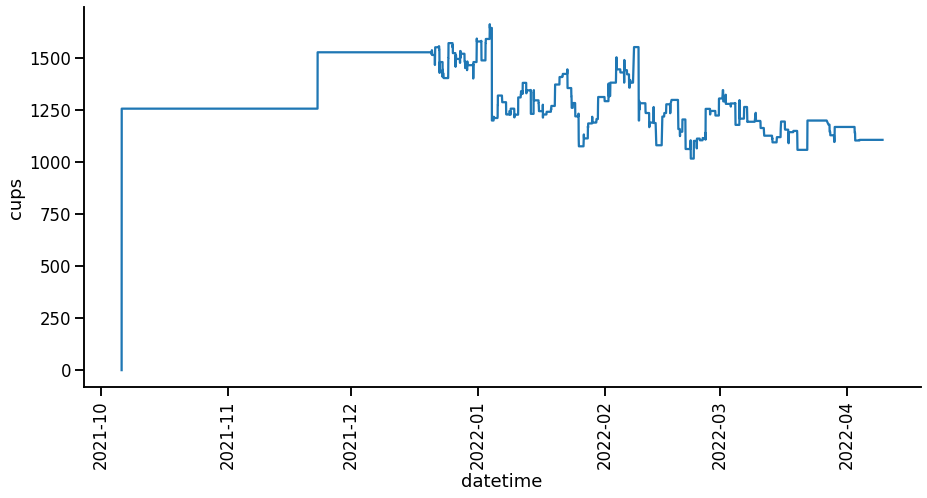

In [ ]:
plt.figure(figsize=(15,7))
seaborn.lineplot(data=f , y="cups", x="datetime")
plt.xticks(rotation=90)
seaborn.despine()

En el gráfico se puede observar el rendimiento del jugador, durante el período de tiempo (meses) que se mantuvo activo, en relación a las copas ganadas.

In [ ]:
filtered_df.datetime.describe()  #aca se puede ver la descripción de los días jugados por el jugador

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   15287
unique                  15276
top       2022-03-22 00:04:37
freq                        2
first     2021-10-06 02:52:40
last      2022-04-09 15:17:13
Name: datetime, dtype: object

Para tener un poco mas de información del jugador, armamos una nueva columna a partir de la diferencia de tiempo entre cada registro que se generaba mientras jugaba. Luego, realizamos la sumatoria de esas diferencias para calcular aproximadamente cuánto tiempo  le dedicó al juego. Lo cual nos dió 185 días con 12 hs 24 min y 33 seg.

In [ ]:
f['time_of_game']=f['datetime'].diff()
print(f.time_of_game.sum())
f

185 days 12:24:33


,id,datetime,has_studies,gender,country,state,age,cups,Date,Time,time_of_game
447316,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2021-10-06 02:52:40,f,Hombre,Argentina,Santa Fe,1992.0,0,2021-10-06,02:52:40,NaT
447332,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2021-10-06 02:55:03,f,Hombre,Argentina,Santa Fe,1992.0,1257,2021-10-06,02:55:03,0 days 00:02:23
447452,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2021-10-06 03:10:05,f,Hombre,Argentina,Santa Fe,1992.0,1257,2021-10-06,03:10:05,0 days 00:15:02
447573,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2021-10-06 03:20:07,f,Hombre,Argentina,Santa Fe,1992.0,1257,2021-10-06,03:20:07,0 days 00:10:02
447661,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2021-10-06 03:30:14,f,Hombre,Argentina,Santa Fe,1992.0,1257,2021-10-06,03:30:14,0 days 00:10:07
...,...,...,...,...,...,...,...,...,...,...,...
4221871,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2022-04-09 13:12:50,f,Hombre,Argentina,Santa Fe,1992.0,1107,2022-04-09,13:12:50,0 days 00:35:46
4222198,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2022-04-09 13:31:44,f,Hombre,Argentina,Santa Fe,1992.0,1107,2022-04-09,13:31:44,0 days 00:18:54
4222854,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2022-04-09 14:16:42,f,Hombre,Argentina,Santa Fe,1992.0,1107,2022-04-09,14:16:42,0 days 00:44:58
4223607,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2022-04-09 15:11:18,f,Hombre,Argentina,Santa Fe,1992.0,1107,2022-04-09,15:11:18,0 days 00:54:36


A partir de estos datos podemos ver que no es tán confiable la información obtenida anteriormente ya que no parece posible que el máximo de tiempo jugado sea de 2 días. 

In [ ]:
f.time_of_game.describe()

count                        15286
mean     0 days 00:17:28.585175978
std      0 days 00:43:11.486345164
min                0 days 00:00:00
25%                0 days 00:09:55
50%                0 days 00:10:17
75%         0 days 00:19:06.750000
max                2 days 00:00:10
Name: time_of_game, dtype: object

In [ ]:
tiempo_de_juego=f["datetime"].diff().sum()
print(tiempo_de_juego)

185 days 12:24:33


In [ ]:
f.dtypes

id                       object
datetime         datetime64[ns]
has_studies              object
gender                   object
country                  object
state                    object
age                     float64
cups                      int64
Date             datetime64[ns]
Time                     object
time_of_game    timedelta64[ns]
dtype: object

In [ ]:
#corroboramos el cálculo realizado anteriormente
start = "2021-10-06"
end = "2022-04-09"
date_generated = pd.date_range(start, end)
print (date_generated)
filtered_day= f[f["Date"].isin(date_generated)]
filtered_day.time_of_game.sum()

DatetimeIndex(['2021-10-06', '2021-10-07', '2021-10-08', '2021-10-09',
               '2021-10-10', '2021-10-11', '2021-10-12', '2021-10-13',
               '2021-10-14', '2021-10-15',
               ...
               '2022-03-31', '2022-04-01', '2022-04-02', '2022-04-03',
               '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07',
               '2022-04-08', '2022-04-09'],
              dtype='datetime64[ns]', length=186, freq='D')


Timedelta('185 days 12:24:33')

Tambíen se puede analizar el rendimiento del jugador durante un día en particular, en este caso elejimos el 6/10/2021, al parecer, día en el que el jugador comienza a jugar: 

In [ ]:
relevant_day= ['2021-10-06']
filtered_day= f[f["Date"].isin(relevant_day)]
filtered_day.head()

,id,datetime,has_studies,gender,country,state,age,cups,Date,Time,time_of_game
447316,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2021-10-06 02:52:40,f,Hombre,Argentina,Santa Fe,1992.0,0,2021-10-06,02:52:40,NaT
447332,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2021-10-06 02:55:03,f,Hombre,Argentina,Santa Fe,1992.0,1257,2021-10-06,02:55:03,0 days 00:02:23
447452,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2021-10-06 03:10:05,f,Hombre,Argentina,Santa Fe,1992.0,1257,2021-10-06,03:10:05,0 days 00:15:02
447573,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2021-10-06 03:20:07,f,Hombre,Argentina,Santa Fe,1992.0,1257,2021-10-06,03:20:07,0 days 00:10:02
447661,a68b412c4282555f15546cf6e1fc42893b7e07f271557c...,2021-10-06 03:30:14,f,Hombre,Argentina,Santa Fe,1992.0,1257,2021-10-06,03:30:14,0 days 00:10:07


Realizando el mismo cálculo que antes:

In [ ]:
tiempo_de_juego_fd=filtered_day.datetime.diff().sum()
print(tiempo_de_juego_fd)

0 days 20:57:34


In [ ]:
filtered_day.describe()

,age,cups,time_of_game
count,100.0,100.00,99
mean,1992.0,1244.43,0 days 00:12:42.161616161
std,0.0,125.70,0 days 00:02:41.012910312
min,1992.0,0.00,0 days 00:02:23
25%,1992.0,1257.00,0 days 00:10:00.500000
50%,1992.0,1257.00,0 days 00:14:56
75%,1992.0,1257.00,0 days 00:15:00
max,1992.0,1257.00,0 days 00:15:39


Podemos deducir que durante este día, el jugador ganó 1257 copas (es raro porque si analizamos el df entre el primer registro y el segundo pasaron 2 min y 23 seg, tiempo en el que ganó todas esas copas) y jugó 20 H 57 M y 34 S.

# **Análisis descriptivo global (teniendo en cuenta a todos los jugadores).**

In [ ]:
import datetime
df["Date"] = df["datetime"].dt.date
df["Time"] = df["datetime"].dt.time
df.sort_values(by=['Date','Time']) 

,id,datetime,has_studies,gender,country,state,age,cups,Date,Time
446631,7902699be42c8a8e46fbbb4501726517e86b22c56a189f...,2021-09-30 22:04:23,NaN,NaN,NaN,NaN,NaN,0,2021-09-30,22:04:23
446632,7902699be42c8a8e46fbbb4501726517e86b22c56a189f...,2021-09-30 22:05:02,NaN,NaN,NaN,NaN,NaN,1370,2021-09-30,22:05:02
446633,7902699be42c8a8e46fbbb4501726517e86b22c56a189f...,2021-09-30 22:20:02,NaN,NaN,NaN,NaN,NaN,1370,2021-09-30,22:20:02
446634,7902699be42c8a8e46fbbb4501726517e86b22c56a189f...,2021-09-30 22:30:03,NaN,NaN,NaN,NaN,NaN,1370,2021-09-30,22:30:03
446635,7902699be42c8a8e46fbbb4501726517e86b22c56a189f...,2021-09-30 22:45:03,NaN,NaN,NaN,NaN,NaN,1370,2021-09-30,22:45:03
...,...,...,...,...,...,...,...,...,...,...
4404235,3daebbc6dfd81355f1cc9d9565ab4a4a53bda47f611752...,2022-04-18 13:15:17,f,Hombre,Venezuela,Aragua,1973.0,1108,2022-04-18,13:15:17
4404341,311ba2ed6a5b4105fbfdb0a8b745d22fe1b3ecc0efff5c...,2022-04-18 13:15:18,t,Hombre,Venezuela,Caracas,1996.0,1166,2022-04-18,13:15:18
4404387,bf0a60ee19adc7954e2248d0c4fd7fed44671ea2cff24a...,2022-04-18 13:15:20,t,Hombre,Venezuela,Portuguesa,1997.0,1081,2022-04-18,13:15:20
4404236,f0d588a225e6e6ba0501a3f787230abf579f6db2dd55be...,2022-04-18 13:15:22,f,Hombre,Venezuela,Anzuategui,1989.0,1196,2022-04-18,13:15:22


Previo a realizar el análisis descriptivo agrupamos el dataframe de acuerdo al id, de tal manera que en cada fila se represente a un jugador en particular.

In [ ]:
aggregation_functions = { 'datetime': 'last', 'has_studies': 'first', 'country': 'first', "gender":"first",
                             "state":"first", "age":"first","cups": "max"  }
df_new = df.groupby(df['id']).aggregate(aggregation_functions)
df_new

,datetime,has_studies,country,gender,state,age,cups
id,,,,,,,
00037f39cf870a1f49129f9c82d935665d352ffd25ea3296208f6f7b16fd654f,2022-02-08 16:22:28,t,Venezuela,Hombre,Miranda,1997.0,1211
000f21ac06aceb9cdd0575e82d0d85fc39bed0a7a1d71970ba1641666a44f530,2022-04-18 13:13:58,t,Venezuela,Hombre,Caracas,2003.0,1559
00328ce57bbc14b33bd6695bc8eb32cdf2fb5f3a7d89ec14a42825e15d39df60,2022-04-18 13:15:08,t,Argentina,Hombre,Chubut,1996.0,1859
0038263cc90dfa55d621a6425e46020136a318d12b974340f518892a6ef690ff,2022-04-18 13:13:57,t,venezuela,Hombre,anzoategui,1996.0,1221
0087cf99a4636ebd9a0f66eaf98fde8bca977e2a274bc832cc903c3561735e9d,2022-02-12 17:33:58,t,Argentina,Hombre,Buenos Aires,1995.0,1200
...,...,...,...,...,...,...,...
ff2ccb6ba423d356bd549ed4bfb76e96976a0dcde05a09996a1cdb9f83422ec4,2022-03-12 11:18:55,t,Venezuela,Hombre,Ezequiel zamora,2000.0,1724
ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a,2022-04-18 13:13:29,t,Argentina,Hombre,Buenos aires,2000.0,1856
ffa6059b954a4602a9fa1518d10ca6163bce3f9d4bd3ee51c860eb6c2da16675,2022-01-22 15:34:32,t,Argentina,Hombre,Buenos Aires,2003.0,1176


In [ ]:
df_new.isnull().sum()

datetime       0
has_studies    7
country        7
gender         7
state          9
age            7
cups           0
dtype: int64

Para poder llevar a cabo un análisis más confiable y fácil de entender, es necesario corregir algunas variables del dataset. Una de ellas es la variable "*age*", que indica el año de nacimiento del jugador/a. Lo reemplazamos por la variable "*year_of_birth*", lo que representa un nombre apropiado para este caso.

**Columna age**

In [ ]:
df_new.rename(columns={'age':'year_of_birth'},
               inplace=True)


In [ ]:
df_new["year_of_birth"].unique()

array([1997., 2003., 1996., 1995., 1993., 2000., 1999., 1992., 1998.,
       2001., 2002., 1990., 1994., 1979., 1991., 1984., 2005., 2004.,
          3., 1980., 1987., 1966., 1959., 1981., 2021., 2009., 1976.,
       1982., 1974., 1989., 1973., 1961., 1988.,  200.,   99.,   nan,
       1986., 1977., 1975.,   91., 1985.,   97., 1968., 1978., 1983.,
       2022., 1972., 1967., 1970., 1963.])

En segundo lugar, reemplazamos los datos erróneos en la columna "year_of_birth". Consideramos e intuimos que los usuarios escribieron su año de nacimento de manera incorrecta. Por ejemplo: algunos usuarios colocaron ".91" o ".3" en dicha columna, lo cual esta mal. Casi con seguridad podemos decir que colocaron el año en forma abreviada. Por lo tanto lo reemplazamos por los valores "1993" o "2003" respectivamente. Dicha corrección será aplicada para cada uno de los datos erróneos.

In [ ]:
df_new["year_of_birth"]=df_new["year_of_birth"].replace([91.,97.,99.,200.,3.],[1991.,1997.,1999.,2000.,2003.])


In [ ]:
df_new["year_of_birth"].unique()

array([1997., 2003., 1996., 1995., 1993., 2000., 1999., 1992., 1998.,
       2001., 2002., 1990., 1994., 1979., 1991., 1984., 2005., 2004.,
       1980., 1987., 1966., 1959., 1981., 2021., 2009., 1976., 1982.,
       1974., 1989., 1973., 1961., 1988.,   nan, 1986., 1977., 1975.,
       1985., 1968., 1978., 1983., 2022., 1972., 1967., 1970., 1963.])

Finalmente, agregamos una columna adicional cuyo nombre es "age_aprox". Este atributo almacenará las edades aproximadas de los jugadores/as. El cálculo consiste en restar el año actual (2022) con los años de nacimientos (year_of_birth)

In [ ]:
df_new["age_aprox"]= 2022 - df_new["year_of_birth"]

In [ ]:
df_new

,datetime,has_studies,country,gender,state,year_of_birth,cups,age_aprox
id,,,,,,,,
00037f39cf870a1f49129f9c82d935665d352ffd25ea3296208f6f7b16fd654f,2022-02-08 16:22:28,t,Venezuela,Hombre,Miranda,1997.0,1211,25.0
000f21ac06aceb9cdd0575e82d0d85fc39bed0a7a1d71970ba1641666a44f530,2022-04-18 13:13:58,t,Venezuela,Hombre,Caracas,2003.0,1559,19.0
00328ce57bbc14b33bd6695bc8eb32cdf2fb5f3a7d89ec14a42825e15d39df60,2022-04-18 13:15:08,t,Argentina,Hombre,Chubut,1996.0,1859,26.0
0038263cc90dfa55d621a6425e46020136a318d12b974340f518892a6ef690ff,2022-04-18 13:13:57,t,venezuela,Hombre,anzoategui,1996.0,1221,26.0
0087cf99a4636ebd9a0f66eaf98fde8bca977e2a274bc832cc903c3561735e9d,2022-02-12 17:33:58,t,Argentina,Hombre,Buenos Aires,1995.0,1200,27.0
...,...,...,...,...,...,...,...,...
ff2ccb6ba423d356bd549ed4bfb76e96976a0dcde05a09996a1cdb9f83422ec4,2022-03-12 11:18:55,t,Venezuela,Hombre,Ezequiel zamora,2000.0,1724,22.0
ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a,2022-04-18 13:13:29,t,Argentina,Hombre,Buenos aires,2000.0,1856,22.0
ffa6059b954a4602a9fa1518d10ca6163bce3f9d4bd3ee51c860eb6c2da16675,2022-01-22 15:34:32,t,Argentina,Hombre,Buenos Aires,2003.0,1176,19.0


**Analizamos la columna "has_studies"**

In [ ]:
df_new["has_studies"].unique()

array(['t', 'f', None], dtype=object)

Se considera que no es necesario modificar los valores de esta columna.

**Análisis de la columna "country"**

In [ ]:
df_new["country"].unique()

array(['Venezuela', 'Argentina', 'venezuela', 'Ecuador', 'argentina',
       'Costa Rica', 'Argentino', 'Colombia', 'México', 'ARGENTINA',
       'colombia', 'Philippines', 'Uruguay', 'Venezuela - Maracaibo',
       'Venenezuela', 'España', 'Chile', 'Cuba', None, 'Perú', 'Bolivia',
       'De Venezuela'], dtype=object)

En el atributo country aparecen “argentina” y “Argentina”, o también “Venezuela” y “de venezuela”, por lo que el código lo toma como diferentes países y decidimos corregirlo para unificar los datos. En el caso de "Perú" y "México" decidimos reemplazarlos por "Peru" y "Mexico" sin acento, para evitar futuros problemas.  

In [ ]:
df_new["country"]=df_new["country"].replace(["venezuela","De Venezuela","argentina","Venezuela - Maracaibo","ARGENTINA","colombia","Venenezuela","Argentino","Perú","México"],["Venezuela","Venezuela","Argentina","Venezuela","Argentina", "Colombia","Venezuela","Argentina","Peru","Mexico"])

In [ ]:
df_new["country"].unique()

array(['Venezuela', 'Argentina', 'Ecuador', 'Costa Rica', 'Colombia',
       'Mexico', 'Philippines', 'Uruguay', 'España', 'Chile', 'Cuba',
       None, 'Peru', 'Bolivia'], dtype=object)

In [ ]:
df_new.country.value_counts()

Argentina      853
Venezuela      532
Philippines      8
Colombia         7
Peru             6
Uruguay          5
Ecuador          4
Costa Rica       4
España           4
Cuba             3
Mexico           2
Chile            2
Bolivia          2
Name: country, dtype: int64

In [ ]:
porc_j_AoV=(((853+532)/len(df_new.country))*100)
porc_j_AoV

print('Más del', int(porc_j_AoV),'% de los jugadores pertenece a Argentina o Venezuela' )

Más del 96 % de los jugadores pertenece a Argentina o Venezuela


**Columna state** 


In [ ]:
df_new["state"].unique()

array(['Miranda', 'Caracas', 'Chubut', 'anzoategui', 'Buenos Aires',
       'Buenos aires', 'La guaira', 'Táchira', 'entre rios', 'Chaco',
       'Zulia', 'Mendoza', 'Entre Ríos', 'Valencia', 'Lara', 'Córdoba',
       'Imbabura', 'Monagas', 'Anzoategui', 'Entre Rios', 'buenos aires',
       'Guárico', 'Rio Negro', 'Corrientes', 'entre ríos', 'Falcon',
       'Aragua', 'Capital Federal', 'Entre ríos', 'Distrito capital',
       'Santa fe', 'Barinas', 'San Juan', 'Anzoátegui', 'Mérida',
       'Santa Fe', 'Yaracuy', 'De San Francisco', 'Misiones',
       'Santiago del estero', 'Jujuy', 'Santa Fé', 'santiago del estero',
       'San José', 'Centro occidente', 'la pampa', 'Sucre', 'San Luis',
       'Maracay', 'Entre rios', 'Cordoba', 'Nueva Esparta',
       'Santaigo del Estero', 'Salta', 'Estado bolivar', 'santa fe',
       'Estado La Guaira', 'Santiago del Estero', 'Distrito Capital',
       'CABA', 'Duaca', 'Maturin', 'Falcón', 'Maracaibo', 'Tucumán',
       'zulia', 'la rioja', 'Cundi

***Columna state = Argentina*** 

En particular analizaremos la distribución de jugadores que pertenecen a Argentina.

In [ ]:
states_arg = df_new.state[df_new.country == 'Argentina'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 100
states_arg

,state
BUENOS AIRES,2
Bs as,1
Bs.as,1
Buenas Aires,1
Bueno Aires,3
Buenoas Aires,1
Buenos Aires,311
Buenos aires,92
Burnos Aires,1
C.A.B.A,1


Primero modificaremos los datos para unificar las províncias que aparecen repetidas pero de forma diferente:

Provincia de Buenos Aires

In [ ]:
df_new.state.replace(to_replace = ['BUENOS AIRES','Bs as', 'Bs.as', 'Buenas Aires', 'Bueno Aires','Buenoas Aires','Buenos aires','Burnos Aires', 'Mar del plata', 'buenos aires', 'Tigre','buenos aries'], 
                   value = 'Buenos Aires',
                   inplace = True)

Ciudad de Buenos Aires

In [ ]:
df_new.state.replace(to_replace = ['C.A.B.A','Caba','caba','Capital Federal', 'Ciudad Autónoma de Buenos Aires', 'Ciudad autónoma de Buenos Aires','Ciudad de Buenos Aires','Ciudad de Buenos aires','Pilar','capital federal'],
                     value = 'CABA',
                     inplace = True)

Córdoba

In [ ]:
df_new.state.replace(to_replace = ['Córdoba','cordoba'],
                     value = 'Cordoba',
                     inplace = True)

Entre Rios

In [ ]:
df_new.state.replace(to_replace = ['Entre Ríos','Entre rios','Entre ríos', 'entre rios', 'entre ríos'],
                     value = 'Entre Rios',
                     inplace = True)

Santa Fe

In [ ]:
df_new.state.replace(to_replace = ['Santa Fé','Santa fa','Santa fe', 'Santa fé', 'Santafe', 'santa fe'],
                     value = 'Santa Fe',
                     inplace = True)

Santiago del Estero

In [ ]:
df_new.state.replace(to_replace = ['Santaigo del Estero','Santiago Del Estero','Santiago del estero', 'santiago del estero'],
                     value = 'Santiago del Estero',
                     inplace = True)

Jujuy

In [ ]:
df_new.state.replace(to_replace = ['San salvador de jujuy'],
                     value = 'Jujuy',
                     inplace = True)

Salta

In [ ]:
df_new.state.replace(to_replace = ['Salta Capital'],
                     value = 'Salta',
                     inplace = True)

Santa Cruz

In [ ]:
df_new.state.replace(to_replace = ['Santa cruz', 'santa cruz'],
                     value = 'Santa Cruz',
                     inplace = True)

Tucuman

In [ ]:
df_new.state.replace(to_replace = ['Tucumán'],
                     value = 'Tucuman',
                     inplace = True)

Tierra del Fuego

In [ ]:
df_new.state.replace(to_replace = ['Tierra Del Fuego', 'Tierra del fuego'],
                     value = 'Tierra del Fuego',
                     inplace = True)

Neuquen

In [ ]:
df_new.state.replace(to_replace = ['Neuquén'],
                     value = 'Neuquen',
                     inplace = True)

Rio Negro

In [ ]:
df_new.state.replace(to_replace = ['Rio negro', 'Río negro'],
                     value = 'Rio Negro',
                     inplace = True)

La Rioja

In [ ]:
df_new.state.replace(to_replace = ['la Rioja', 'la rioja'],
                     value = 'La Rioja',
                     inplace = True)

San Luis

In [ ]:
df_new.state.replace(to_replace = ['San luis'],
                     value = 'San Luis',
                     inplace = True)

La Pampa

In [ ]:
df_new.state.replace(to_replace = ['la pampa'],
                     value = 'La Pampa',
                     inplace = True)

In [ ]:
df_new.state[df_new.country == 'Argentina'].value_counts(dropna=False).sum()

853

In [ ]:
states_arg = df_new.state[df_new.country == 'Argentina'].value_counts(dropna=False).sort_values(ascending=False).to_frame()
pd.options.display.max_rows = 100
states_arg

,state
Buenos Aires,440
Santa Fe,122
Cordoba,56
Mendoza,37
Entre Rios,34
CABA,25
Santiago del Estero,21
Chaco,20
Rio Negro,14
Salta,12


# **Sección 3: Visualización**

**Análisis estadístico de las edades de los jugadores**

In [ ]:
df_new["age_aprox"].describe().apply(lambda s: "{0:.2f}".format(s))

count    1432.00
mean       24.94
std         5.75
min         0.00
25%        21.00
50%        24.00
75%        27.00
max        63.00
Name: age_aprox, dtype: object

In [ ]:
df_new["age_aprox"].mode()

0    22.0
dtype: float64

Métricas estadisticas de la variable **"age_aprox"**:


*   **Media**: 25 años (aproximadamente)
*   **Desviación Standar**: 5.75 años
*   **Valor Mínimo**: 0 años (no tiene sentido, posiblemente se deba a un error del usuario al cargar la fecha de nacimiento)
*   **Cuartil 1 (25%)**: 21 años
*   **Cuartil 2 (mediana)**: 24 años.
*   **Cuartil 3 (75%)**: 27 años.
*   **Valor Máximo**: 63 años



En el siguiente gráfico  podemos ver cómo se distribuyen las edades de los jugadores

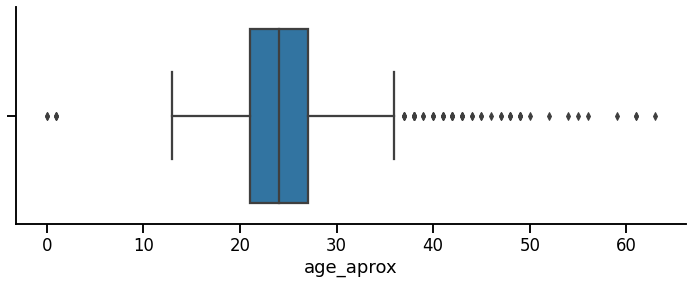

In [ ]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_new["age_aprox"])
seaborn.despine()


Observando el Boxplot podemos afirmar que la edad de los jugadores mayormente se concentra entre los 20 y los 30 años, mas exactamente en el Rango Inter Cuartil, y tambien se pueden apreciar datos atípicos 

In [ ]:
q3 = df_new['age_aprox'].quantile(75/100)  
q1 = df_new['age_aprox'].quantile(25/100) 
iqr = q3 - q1
maxq= q3+1.5*iqr
print('Extremo superior: ',maxq)
minq= q1-1.5*iqr
print('Extremo inferior: ',minq)
#otro criterio
q95 = df_new['age_aprox'].quantile(95 / 100)
print("Cuantil 95%: ",q95)
q99 = df_new['age_aprox'].quantile(99 / 100)
print("Cuantil 99%: ",q99)

Extremo superior:  36.0
Extremo inferior:  12.0
Cuantil 95%:  33.0
Cuantil 99%:  48.0


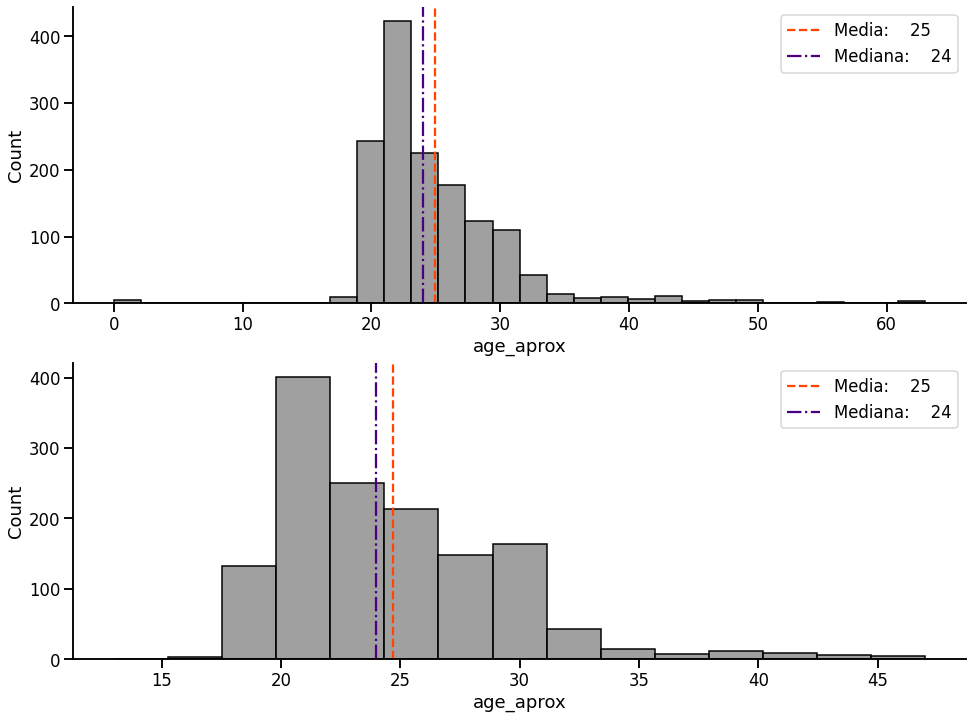

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(16, 12))

seaborn.histplot(df_new["age_aprox"], bins=30, ax=axes[0], color='gray')

axes[0].axvline(df_new["age_aprox"].mean(), color='orangered',
            linestyle='--', label='Media: '+str('{:5.0f}'.format(df_new["age_aprox"].mean())))
axes[0].axvline(df_new["age_aprox"].median(), color='indigo',
            linestyle='-.', label='Mediana: '+str('{:5.0f}'.format(df_new["age_aprox"].median())))


limite_inferior=12
limite_superior=48 #q99 #maxq
filtered_df = df_new[(limite_inferior< df_new["age_aprox"]) & (df_new["age_aprox"] < limite_superior)]
seaborn.histplot(filtered_df["age_aprox"], bins=15, ax=axes[1], color='gray')
axes[1].axvline(filtered_df["age_aprox"].mean(), color='orangered',
            linestyle='--', label='Media: '+str('{:5.0f}'.format(filtered_df["age_aprox"].mean())))
axes[1].axvline(filtered_df["age_aprox"].median(), color='indigo',
            linestyle='-.', label='Mediana: '+str('{:5.0f}'.format(filtered_df["age_aprox"].median())))

axes[0].legend()
axes[1].legend()
seaborn.despine()


En el histograma se observa que las edades estan distribuidas de manera casi simétrica, ya que la media y la mediana no difieren en mucho.

**Gráfico de caja de la distribución de la edades de los jugadores por país**

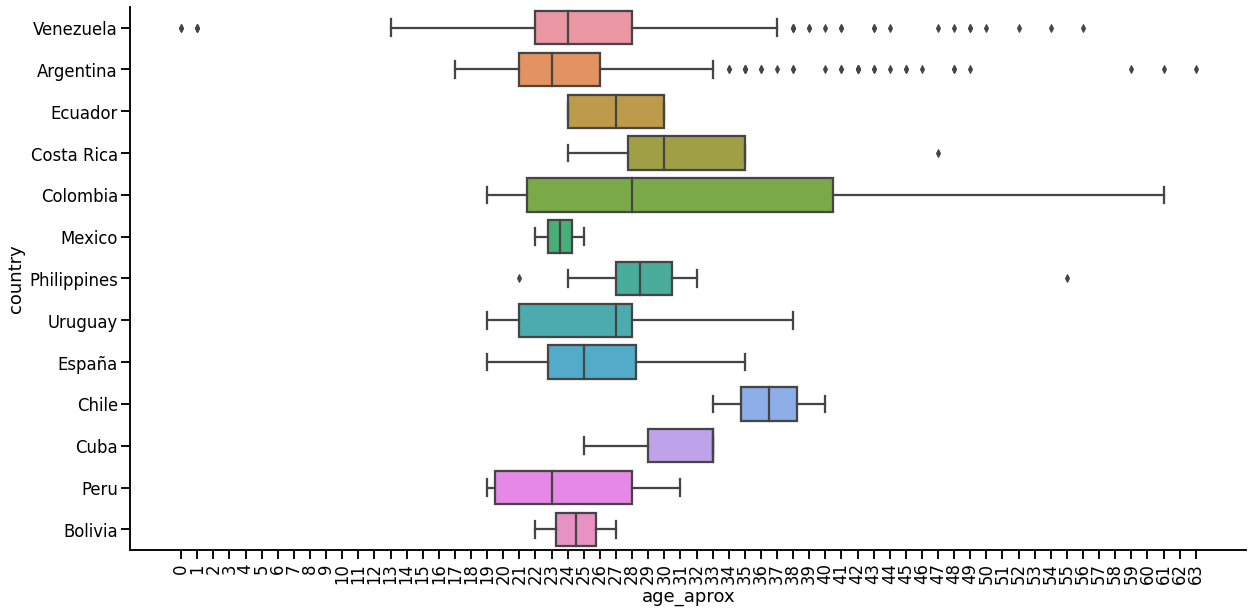

In [ ]:
plt.figure(figsize=(20, 10))
#interesting_countries = ["Argentina","Venezuela"] 
#filtered_df = df[df.country.isin(interesting_countries)]
#seaborn.boxplot(data=filtered_df, x="age_aprox", y="country")
seaborn.boxplot(data=df_new, x="age_aprox", y="country")
min=0
max=63
ticks = range(min, max + 1)
plt.xticks(ticks)
plt.xticks(rotation=90)
seaborn.despine()


Los valores atípicos con respecto a las edades de los jugdores de dan en mayor medida en el caso de "Argentina" y "Venezuela", teniendo estos paises representan el 96% de los registros en el juego.

**Analizamos la relación entre las edades y las copas ganadas separandolas por genero**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text major ticklabel objects>)

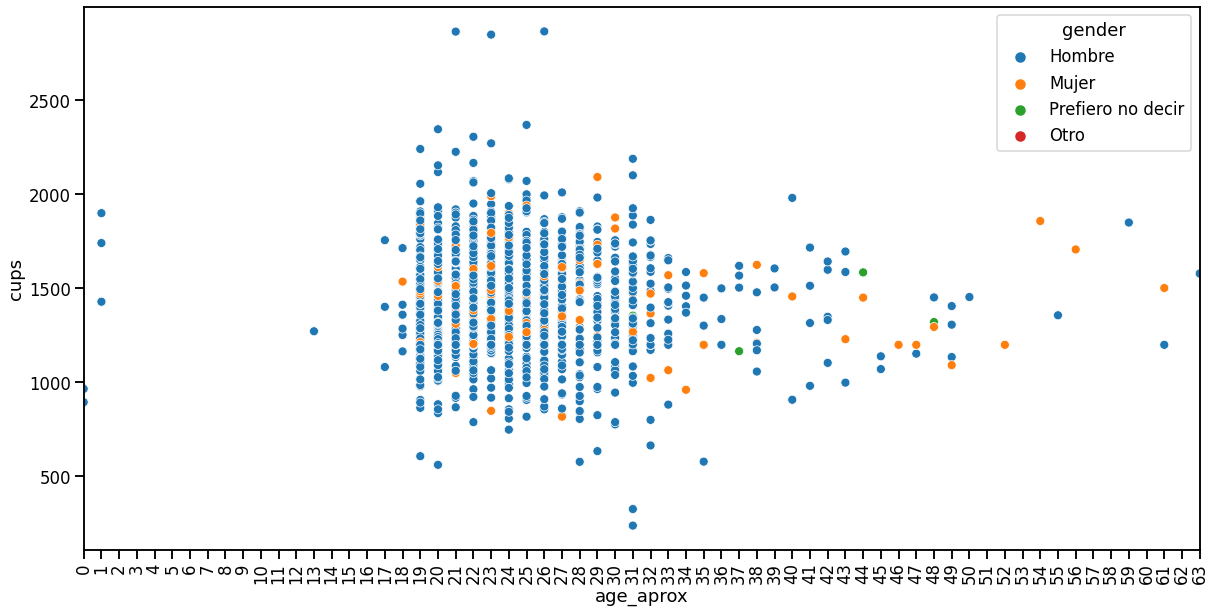

In [ ]:
plt.figure(figsize = [20,10])
seaborn.scatterplot(data=df_new, x="age_aprox", y="cups", hue="gender") 
plt.xlim([0,63])
min=0
max=63
ticks = range(min, max + 1)
plt.xticks(ticks)
plt.xticks(rotation=90)

El gráfico nos muestra que:


*   En el caso de los varones, los que más copas ganan son aquellos cuya edad se encuentra entre los 20 y 26 años.
*   Para el caso de las mujeres, las que más copas ganaron son aquellas que tienen una edad de 29 años.



**¿Hay una correlación entre la edad y la cantidad de copas?**

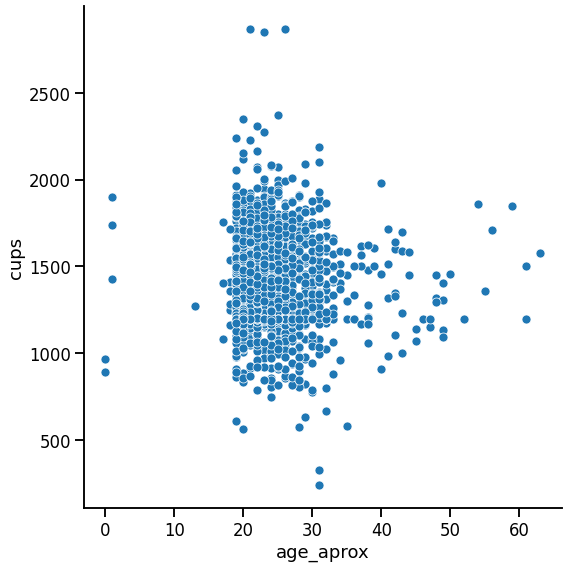

In [ ]:
seaborn.pairplot(data=df_new, y_vars=["cups"],
                 x_vars=['age_aprox'],
                 aspect=1, height=8)

No se puede dicir que hay una correlación general entre las edades y las máximas copas ganadas. Sin embargo, podemos inferir que a partir de los 40 años en adelante, hay una cierta correlación lineal positiva entre ambos atributos, es decir, que cuanto mas grande es el jugador (en edad), mayor es la cantidad de copas máximas ganadas.

**Analizamos el nivel de estudios de los jugadores**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text major ticklabel objects>)

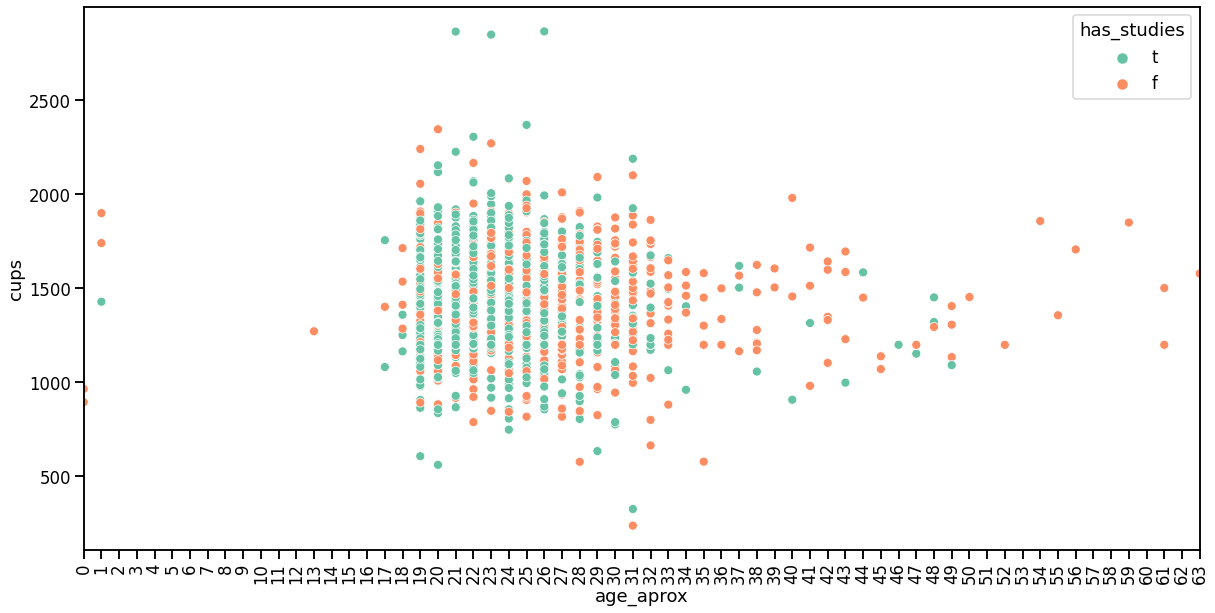

In [ ]:
from matplotlib import pyplot as plt 
import seaborn as sns 

plt.figure(figsize = [20,10])

seaborn.scatterplot(data=df_new, x="age_aprox", y="cups", hue="has_studies", palette = "Set2") 
plt.xlim([0,63])
min=0
max=63
ticks = range(min, max + 1)
plt.xticks(ticks)
plt.xticks(rotation=90)


En el gráfico anterior se visualiza la cantidad de copas ganadas en función de las edades, diferenciandolo (o separandolo) por los estudios.

**Analizamos cada genero por separado**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


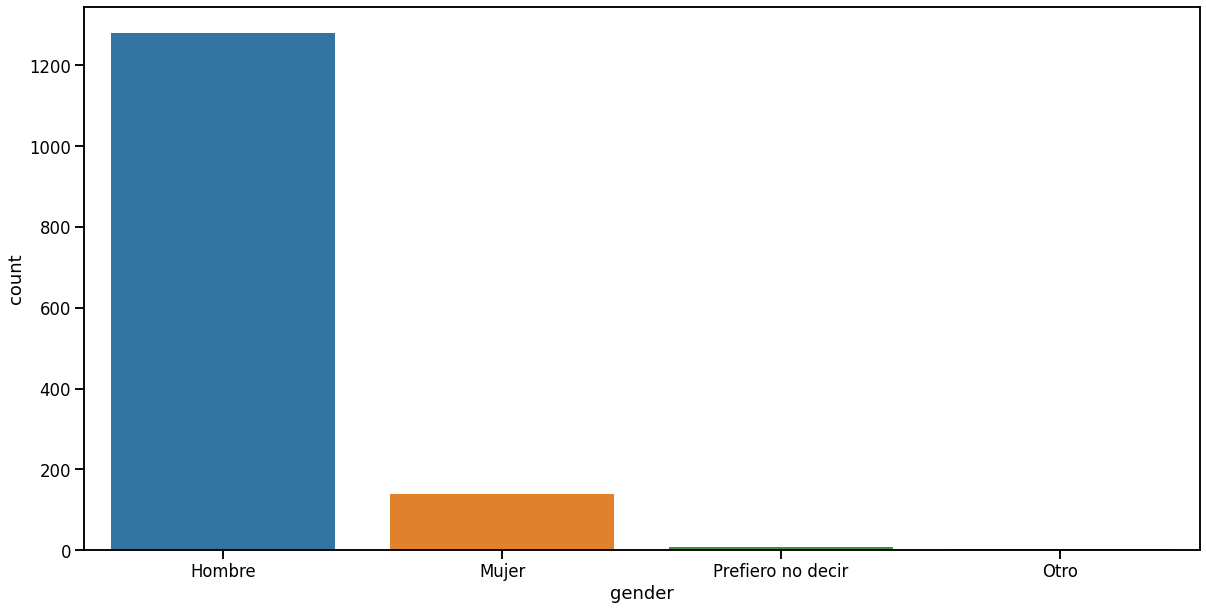

In [ ]:
plt.figure(figsize=(20, 10))
seaborn.countplot(df_new.gender)

In [ ]:
df_new.gender.value_counts(dropna=False)

Hombre               1281
Mujer                 139
Prefiero no decir       9
NaN                     7
Otro                    3
Name: gender, dtype: int64

In [ ]:
df_new.gender.value_counts(dropna=False, normalize=True)

Hombre               0.890202
Mujer                0.096595
Prefiero no decir    0.006254
NaN                  0.004864
Otro                 0.002085
Name: gender, dtype: float64

El 89% de las personas registradas en el juego son "Hombres", el 9,7% son "Mujeres" y el 1,3% son de otros generos, personas que decidieron no decirlo y datos nulos. 

**Gráfico de dispersión entre las máximas copas ganadas y las edades separandolas por estudios, para el caso de los hombres**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


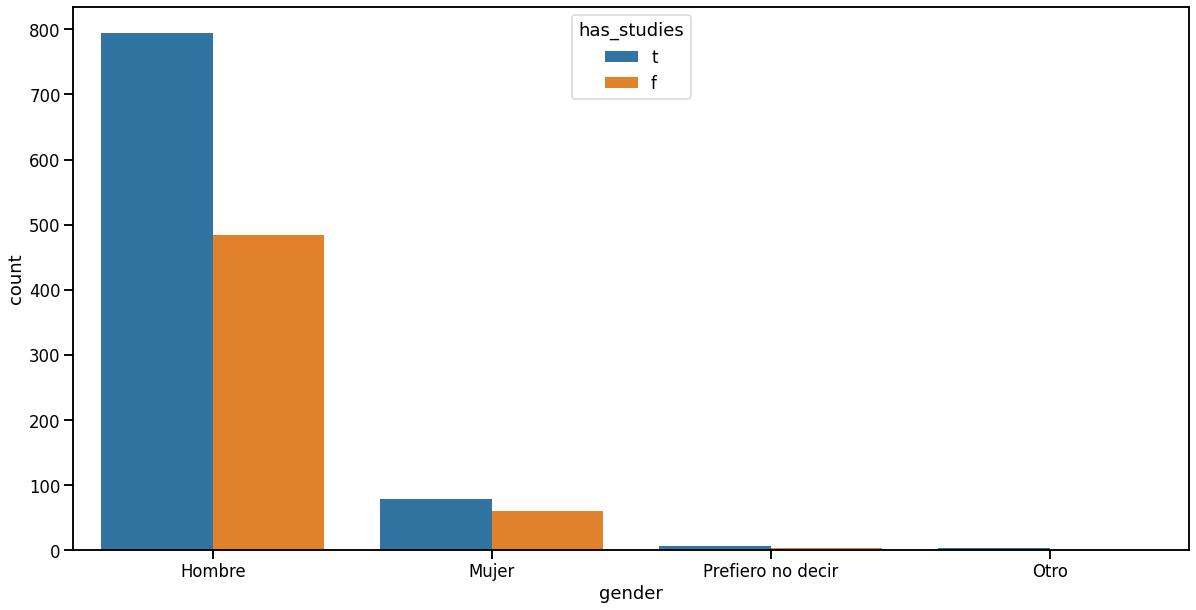

In [ ]:
plt.figure(figsize=(20, 10))
seaborn.countplot(df_new.gender, hue=df_new.has_studies)

Tanto para el caso de los hombres y de las mujeres, se puede ver que hay una mayor cantidad de registros de personas que no estudian. Sin embargo, esta brecha es mayor en el caso de los hombres.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 <a list of 65 Text major ticklabel objects>)

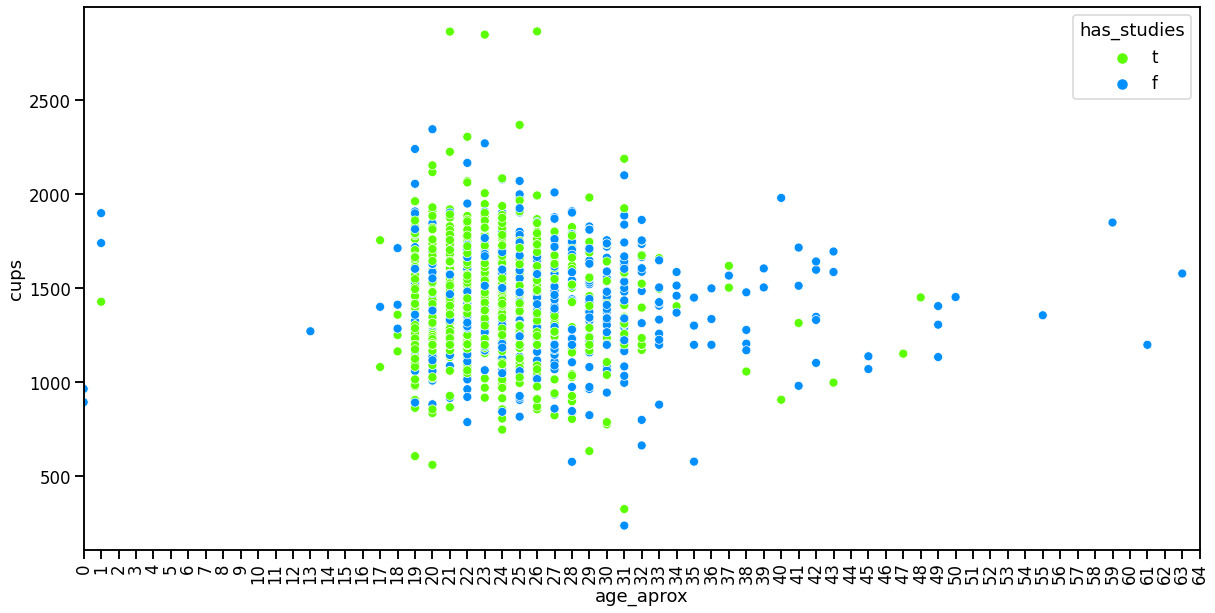

In [ ]:
hombre_si = df_new[df_new['gender'].isin(['Hombre'])]
hombre_si
plt.figure(figsize = [20,10])
seaborn.scatterplot(data=hombre_si, x="age_aprox", y="cups", hue="has_studies", palette= "gist_rainbow") 
plt.xlim([0,63])
min=0
max=64
ticks = range(min, max + 1)
plt.xticks(ticks)
plt.xticks(rotation=90)

Para el caso particular de los hombres, los que llegaron a ganar más copas son aquellos que tienen estudios (o estan estudiando).

**Gráfico de dispersión entre las máximas copas ganadas y las edades separandolas por estudios, para el caso de las mujeres**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]), <a list of 71 Text major ticklabel objects>)

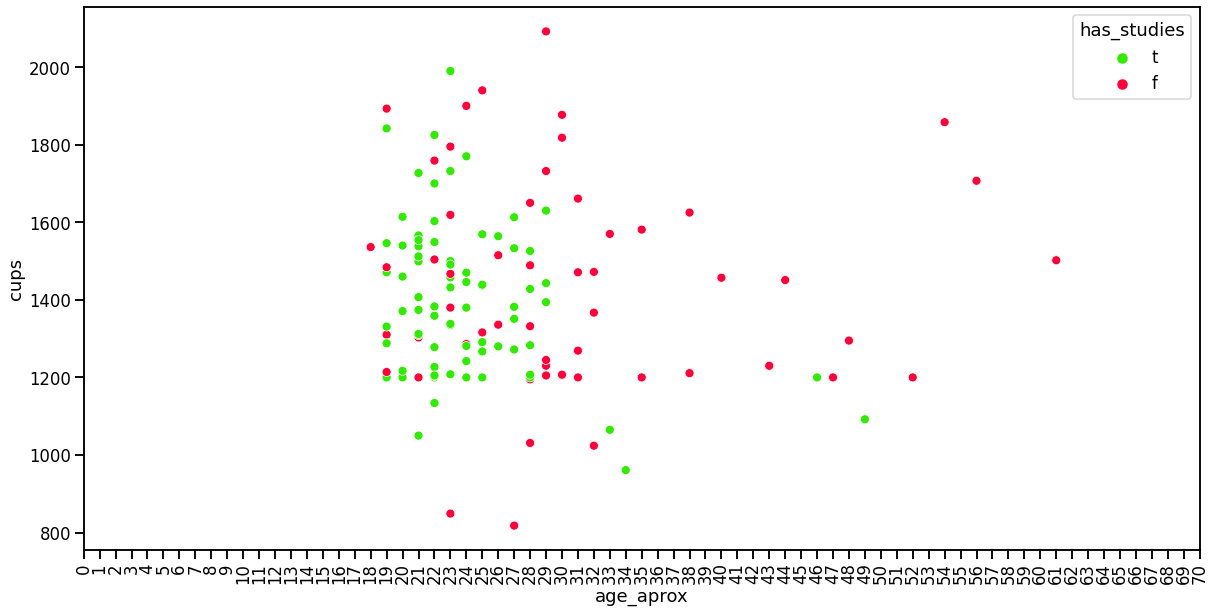

In [ ]:
mujer_si = df_new[df_new['gender'].isin(['Mujer'])]
mujer_si
plt.figure(figsize = [20,10])
seaborn.scatterplot(data=mujer_si, x="age_aprox", y="cups", hue="has_studies",palette= "prism" ) 

min=0
max=70
ticks = range(min, max + 1)
plt.xticks(ticks)
plt.xticks(rotation=90)

En el caso de las mujeres, la que obtuvo mayor cantidad de copas máximas es una mujer que no tiene estudios (o esta estudiando).

In [ ]:
df_new.to_csv('datos_jugadores_clean.csv', index = False)

In [ ]:
# chequear si el archivo se guardo correctamente
import pandas as pd
df_new = pd.read_csv('datos_jugadores_clean.csv')
#pd.set_option('display.max_rows', None)
df_new.head()

,datetime,has_studies,country,gender,state,year_of_birth,cups,age_aprox
0,2022-02-08 16:22:28,t,Venezuela,Hombre,Miranda,1997.0,1211,25.0
1,2022-04-18 13:13:58,t,Venezuela,Hombre,Caracas,2003.0,1559,19.0
2,2022-04-18 13:15:08,t,Argentina,Hombre,Chubut,1996.0,1859,26.0
3,2022-04-18 13:13:57,t,Venezuela,Hombre,anzoategui,1996.0,1221,26.0
4,2022-02-12 17:33:58,t,Argentina,Hombre,Buenos Aires,1995.0,1200,27.0
